<a href="https://colab.research.google.com/github/hanw/eodp-companion/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.2.3 Jacobians

To compute the Jacobian of a function using Python, we'll use the `sympy` library, which provides tools for symbolic mathematics. The Jacobian matrix represents the first-order partial derivatives of a vector-valued function. It's particularly useful for understanding the behavior of multivariate functions.

Let's say we have a function $ f: \mathbb{R}^2 \rightarrow \mathbb{R}^2 $ defined by:
$ f(w) = \begin{bmatrix} f_1(w) \\ f_2(w) \end{bmatrix} = \begin{bmatrix} w_1^2 + w_2^2 \\ e^{w_1} + w_2 \end{bmatrix} $
where $ w = (w_1, w_2) $ is the input vector.

The Jacobian matrix $ J $ of $ f $ at any point $ w $ is given by:
$ J(f)(w) = \begin{bmatrix} \frac{\partial f_1}{\partial w_1} & \frac{\partial f_1}{\partial w_2} \\ \frac{\partial f_2}{\partial w_1} & \frac{\partial f_2}{\partial w_2} \end{bmatrix} $

Here's how you can compute the Jacobian using `sympy`:




In [2]:
#2.2.3
import sympy as sp

# Define symbols
w1, w2 = sp.symbols('w1 w2')

# Define the function f(w) = [f1(w), f2(w)]
f1 = w1**2 + w2**2
f2 = sp.exp(w1) + w2

# Construct the vector function
f = sp.Matrix([f1, f2])

# Define the input vector
w = sp.Matrix([w1, w2])

# Compute the Jacobian
J = f.jacobian(w)

# Display the Jacobian
J


Matrix([
[   2*w1, 2*w2],
[exp(w1),    1]])


This code snippet defines the symbols $ w_1 $ and $ w_2 $, constructs the vector-valued function $ f $, and then computes the Jacobian matrix of $ f $ with respect to the input vector $ w $. The result, `J`, is the Jacobian matrix that consists of the partial derivatives of $ f_1 $ and $ f_2 $ with respect to $ w_1 $ and $ w_2 $. Let's run this example and see the output.

The Jacobian matrix of the function $ f $ with respect to the input vector $ w = (w_1, w_2) $ is:
$ J(f)(w) = \begin{bmatrix} 2w_1 & 2w_2 \\ e^{w_1} & 1 \end{bmatrix} $

This matrix represents the first-order partial derivatives of the components of $ f $ with respect to each of the input variables $ w_1 $ and $ w_2 $, providing a linear approximation of the function's behavior around any point $ w $.

Let's consider a function $ f: \mathbb{R}^3 \rightarrow \mathbb{R}^3 $ with three input variables, defined as:
$ f(w) = \begin{bmatrix} f_1(w) \\ f_2(w) \\ f_3(w) \end{bmatrix} = \begin{bmatrix} w_1^2 + w_2^2 + w_3^2 \\ e^{w_1} + \sin(w_2) + w_3 \\ w_1 \cdot w_2 + \ln(w_3 + 1) \end{bmatrix} $
where $ w = (w_1, w_2, w_3) $ is the input vector.

The Jacobian matrix $ J $ of $ f $ at any point $ w $ is given by the matrix of all first-order partial derivatives of each component of $ f $ with respect to each of the input variables $ w_1, w_2, $ and $ w_3 $:
$ J(f)(w) = \begin{bmatrix} \frac{\partial f_1}{\partial w_1} & \frac{\partial f_1}{\partial w_2} & \frac{\partial f_1}{\partial w_3} \\ \frac{\partial f_2}{\partial w_1} & \frac{\partial f_2}{\partial w_2} & \frac{\partial f_2}{\partial w_3} \\ \frac{\partial f_3}{\partial w_1} & \frac{\partial f_3}{\partial w_2} & \frac{\partial f_3}{\partial w_3} \end{bmatrix} $

Let's compute this Jacobian matrix using `sympy`:

In [ ]:
# Define symbols
w1, w2, w3 = sp.symbols('w1 w2 w3')

# Define the function f(w) = [f1(w), f2(w), f3(w)]
f1 = w1**2 + w2**2 + w3**2
f2 = sp.exp(w1) + sp.sin(w2) + w3
f3 = w1*w2 + sp.log(w3 + 1)

# Construct the vector function
f = sp.Matrix([f1, f2, f3])

# Define the input vector
w = sp.Matrix([w1, w2, w3])

# Compute the Jacobian
J = f.jacobian(w)

# Display the Jacobian
J

This code snippet will compute the Jacobian matrix of the given function $ f $ with respect to the inputs $ w_1, w_2, $ and $ w_3 $. Let's execute it to see the matrix.

The Jacobian matrix of the function $ f $ with three input variables $ w = (w_1, w_2, w_3) $ is:
$ J(f)(w) = \begin{bmatrix} 2w_1 & 2w_2 & 2w_3 \\ e^{w_1} & \cos(w_2) & 1 \\ w_2 & w_1 & \frac{1}{w_3 + 1} \end{bmatrix} $

This matrix provides the first-order partial derivatives of each component of $ f $ with respect to $ w_1, w_2, $ and $ w_3 $, offering insights into how the function $ f $ changes directionally in the 3-dimensional input space.

### Definition 2.7 (Differntiability, multi-output case)
To illustrate the concept of Fréchet differentiability for a multi-output function using Python, let's work with a specific example function and demonstrate how to verify its differentiability at a given point according to the definition you provided.

Consider the function $ f: \mathbb{R}^2 \rightarrow \mathbb{R}^2 $ defined by:
$ f(w) = \left[ \begin{array}{c} f_1(w) \\ f_2(w) \end{array} \right] = \left[ \begin{array}{c} w_1^2 + w_2^2 \\ e^{w_1} + w_2^3 \end{array} \right] $
where $ w = (w_1, w_2) $.

The task is to verify that $ f $ is Fréchet differentiable at a particular point $ w $ (let's choose $ w = (1,1) $ for this example). According to the definition, we need to check that the limit of
$ \lim_{\|v\|_2 \to 0} \frac{\|f(w + v) - f(w) - J(f)(w) \cdot v\|_2}{\|v\|_2} = 0 $
where $ J(f)(w) $ is the Jacobian matrix of $ f $ at $ w $, and $ v $ is an arbitrary direction vector.

We will compute this limit numerically for small values of $ \|v\|_2 $ to illustrate the concept of differentiability:

1. Compute the Jacobian matrix $ J(f)(w) $ at $ w = (1,1) $.
2. For a small vector $ v $, compute $ f(w + v) - f(w) - J(f)(w) \cdot v $.
3. Evaluate the limit by decreasing the magnitude of $ v $ and checking if the ratio approaches 0.



In [3]:
import numpy as np

# Define the function f and its Jacobian at w = (1, 1)
def f(w):
    return np.array([w[0]**2 + w[1]**2, np.exp(w[0]) + w[1]**3])

def J(w):
    return np.array([[2*w[0], 2*w[1]], [np.exp(w[0]), 3*w[1]**2]])

w = np.array([1, 1])  # The point of interest

# Function to check Fréchet differentiability
def check_differentiability(w, epsilons):
    results = []
    for epsilon in epsilons:
        # Generate a small vector v with a magnitude of epsilon
        v = np.random.rand(2) * epsilon
        v_norm = np.linalg.norm(v, 2)
        
        # Compute f(w + v) - f(w) - J(f)(w) * v
        diff = f(w + v) - f(w) - J(w) @ v
        
        # Compute the ratio
        ratio = np.linalg.norm(diff, 2) / v_norm
        results.append((epsilon, ratio))
    return results

# Check differentiability for a range of epsilon values
epsilons = np.logspace(-8, 0, 9)
results = check_differentiability(w, epsilons)

results


[(1e-08, 3.36182359982022e-08),
 (1e-07, 2.8305653658042586e-07),
 (1e-06, 7.73154756903754e-07),
 (1e-05, 1.630950054524941e-05),
 (0.0001, 4.9290469680653423e-05),
 (0.001, 0.0020854235492624366),
 (0.01, 0.023653324274140474),
 (0.1, 0.15198962364614899),
 (1.0, 2.754513204551928)]



Let's implement the steps in Python to demonstrate this:

The results of the numerical check for Fréchet differentiability at $ w = (1,1) $ for our function $ f $ are given by the ratios of $\|f(w + v) - f(w) - J(f)(w) \cdot v\|_2$ over $\|v\|_2$ for decreasing magnitudes of $ v $ (from $1e-08$ up to $1$). The ratios are as follows:

- For $ \epsilon = 1e-08 $, the ratio is approximately $ 3.23e-08 $.
- For $ \epsilon = 1e-07 $, the ratio is approximately $ 1.06e-07 $.
- For $ \epsilon = 1e-06 $, the ratio is approximately $ 2.68e-06 $.
- For $ \epsilon = 1e-05 $, the ratio is approximately $ 5.75e-06 $.
- For $ \epsilon = 0.0001 $, the ratio is approximately $ 1.40e-04 $.
- For $ \epsilon = 0.001 $, the ratio is approximately $ 6.86e-04 $.
- For $ \epsilon = 0.01 $, the ratio is approximately $ 2.79e-02 $.
- For $ \epsilon = 0.1 $, the ratio is approximately $ 9.81e-02 $.
- For $ \epsilon = 1.0 $, the ratio is approximately $ 2.18 $.

As the magnitude of $ v $ decreases (i.e., as we approach $ 0 $), the ratio $\frac{\|f(w + v) - f(w) - J(f)(w) \cdot v\|_2}{\|v\|_2}$ tends to $ 0 $, illustrating the concept of Fréchet differentiability. Specifically, for very small values of $ \epsilon $, the ratio is very close to $ 0 $, consistent with the definition of Fréchet differentiability, which requires this limit to be $ 0 $. This numerical example supports that the given function $ f $ is Fréchet differentiable at the point $ w = (1,1) $.

### Definition 2.8 (Jacobian)
To illustrate the concept of the Jacobian and how it can be used to compute the directional derivative of a function $ f: \mathbb{R}^P \rightarrow \mathbb{R}^M $, let's consider a specific example function. We'll then use Python to compute its Jacobian and apply it to calculate the directional derivative along a given input direction $ v $.

Let's define the function $ f: \mathbb{R}^3 \rightarrow \mathbb{R}^2 $ by:
$ f(w) = \left[ \begin{array}{c} f_1(w) = w_1^2 + w_2^2 + w_3 \\ f_2(w) = e^{w_1} + w_2 \cdot w_3 \end{array} \right] $
where $ w = (w_1, w_2, w_3) $ is the input vector in $\mathbb{R}^3$.

The Jacobian of $ f $ at any point $ w $ is given by the matrix of all partial derivatives of $ f_1 $ and $ f_2 $ with respect to $ w_1, w_2, $ and $ w_3 $:
$ \partial f(w) = \left[ \begin{array}{ccc} \frac{\partial f_1}{\partial w_1} & \frac{\partial f_1}{\partial w_2} & \frac{\partial f_1}{\partial w_3} \\ \frac{\partial f_2}{\partial w_1} & \frac{\partial f_2}{\partial w_2} & \frac{\partial f_2}{\partial w_3} \end{array} \right] $

We'll then compute the directional derivative of $ f $ at $ w $ along an input direction $ v = (v_1, v_2, v_3) $ using the formula:
$ \partial f(w)[v] = \partial f(w) \cdot v $

Here's the Python code to compute the Jacobian and the directional derivative:


In [ ]:
import numpy as np

# Define the function f
def f(w):
    return np.array([w[0]**2 + w[1]**2 + w[2], np.exp(w[0]) + w[1]*w[2]])

# Define the Jacobian of f
def J(w):
    return np.array([
        [2*w[0], 2*w[1], 1],
        [np.exp(w[0]), w[2], w[1]]
    ])

# Compute the directional derivative of f at w along v
def directional_derivative(w, v):
    jacobian = J(w)
    return np.dot(jacobian, v)

# Example input
w = np.array([1, 2, 3])  # Point of interest
v = np.array([0.5, -1, 2])  # Direction vector

# Compute the directional derivative
dd = directional_derivative(w, v)

dd


This code computes the Jacobian matrix of $ f $ at the point $ w = (1, 2, 3) $ and then uses it to calculate the directional derivative of $ f $ along the vector $ v = (0.5, -1, 2) $. Let's execute it and see the result.

The directional derivative of the function $ f $ at the point $ w = (1, 2, 3) $ along the direction vector $ v = (0.5, -1, 2) $ is approximately $[-1, 2.35914091]$. This result is a vector in $\mathbb{R}^2$ that indicates how the function $ f $ changes at the point $ w $ in the direction of $ v $.

### Variaitions along inputs
Variation along an input direction is used in several contexts in mathematics, physics, engineering, and especially in machine learning and optimization. It serves to understand how a function's output changes as its input is varied slightly in a specific direction. This concept is crucial for:

1. **Gradient Descent and Optimization:**
   - In optimization, particularly in the training of machine learning models like neural networks, the variation along input directions (given by the gradient of the loss function with respect to the model's parameters) guides the process of adjusting these parameters to minimize the loss function. This is the essence of gradient descent.
   
2. **Sensitivity Analysis:**
   - In engineering and economics, understanding how changes in input variables affect the output can be crucial for decision-making and design. Variation along an input direction can quantify the sensitivity of the system or model to changes in each input variable.

3. **Directional Derivatives and Gradient:**
   - In mathematics, the concept of directional derivatives extends the idea of partial derivatives by considering the rate of change of a function as one moves from a point in a specific direction. This is often used to find the direction in which a function increases or decreases most rapidly at a point, represented by the gradient.

4. **Physics and Dynamics:**
   - In physics, understanding how a system responds to changes in initial conditions or external forces involves studying variations along these "input" directions. For example, in mechanics, the variation of a particle's position in response to forces (inputs) determines its trajectory.

5. **Control Systems:**
   - In control theory, the response of a system to changes or perturbations in control inputs is fundamental. Variation along input directions can help design controllers that make the system behave in a desired manner, ensuring stability and performance.

6. **Economic Models:**
   - In economics, models often study how changes in inputs (like capital, labor) affect outputs (like production, utility). Variation along input directions can help understand the elasticity of output with respect to various inputs, informing policy and investment decisions.

7. **Computational Geometry and Graphics:**
   - In computer graphics and computational geometry, variations along input directions can help in rendering, simulation, and modeling tasks by understanding how changing parameters (light direction, viewpoint, shape deformation) affects the final image or model.

8. **Machine Learning Model Interpretability:**
   - Variation along input directions is also used in interpreting machine learning models, such as through techniques like saliency maps, which indicate how changes in features affect the model's predictions. This is crucial for understanding model behavior, especially in high-stakes applications like healthcare and finance.

In summary, variation along input directions is a fundamental concept that is widely applicable across disciplines, offering insights into the behavior and performance of systems, functions, and models in response to changes in their inputs.


### Variations along outputs
Variation along output directions is used in several key contexts where the focus is on understanding and exploiting the way changes in the output space of a function or system can inform about its characteristics or guide certain processes. This concept is particularly important in areas such as optimization, sensitivity analysis, and multi-objective decision making. Here are some scenarios where variation along output directions is pivotal:

1. **Multi-Objective Optimization:**
   - In problems where there are multiple objectives to be optimized simultaneously, variation along output directions can help in understanding the trade-offs between different objectives. This is crucial in Pareto optimization where the goal is to find solutions that offer the best trade-offs among competing objectives.

2. **Model Sensitivity and Robustness Analysis:**
   - Analyzing how sensitive a model’s output is to variations in its input can be approached by examining variations in the output space. This is essential for assessing the robustness of models to perturbations or uncertainties in inputs, especially in critical applications such as financial forecasting, climate modeling, and safety-critical engineering systems.

3. **Deep Learning and Feature Attribution:**
   - In deep learning, particularly in interpreting neural network decisions, understanding how variations in the output (such as the probability assigned to different classes) relate to changes in input features is crucial. Techniques that explore output variations, like Integrated Gradients or Layer-wise Relevance Propagation, help in attributing the prediction to input features, enhancing model interpretability.

4. **Economics and Utility Theory:**
   - In economics, understanding how variations in outputs (such as utility or profit) due to changes in consumption or production levels inform about consumer behavior or firm strategies. This can guide policy decisions, market analysis, and economic modeling.

5. **Control Theory and System Identification:**
   - In control theory, exploring how the output of a system varies in response to different control signals or disturbances can provide insights into the system's dynamics and help in designing controllers that achieve desired output behaviors.

6. **Physics and Engineering Simulations:**
   - In simulations involving complex physical phenomena, studying how variations in output quantities (like stress, temperature, or velocity fields) in response to changing conditions or parameters can yield insights into the behavior of physical systems under various scenarios.

7. **Environmental Science and Impact Assessment:**
   - Assessing the impact of environmental changes or policies often involves understanding how these changes affect various output indicators, such as pollution levels, biodiversity, or ecosystem services. Variation along these output dimensions can inform conservation strategies and policy formulations.

8. **Quantitative Finance and Risk Management:**
   - In finance, analyzing how the outputs of financial models (such as the valuation of derivatives or the risk of a portfolio) vary with changes in underlying factors can provide critical insights for risk management, investment strategies, and regulatory compliance.

Variation along output directions enables a nuanced understanding of system or model behavior in multi-dimensional output spaces, facilitating decision-making, interpretation, and analysis across a broad spectrum of disciplines.

### Chain Rule
To demonstrate the chain rule for functions with Python, let's consider two specific functions $f: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ and $g: \mathbb{R}^3 \rightarrow \mathbb{R}$, where $f$ is differentiable at a point $w \in \mathbb{R}^2$ and $g$ is differentiable at $f(w) \in \mathbb{R}^3$. We'll then compute the Jacobian of the composition $g \circ f$ at $w$, illustrating the chain rule.

Let's define:
1. $f(w) = \left[ \begin{array}{c} w_1^2 \\ w_1w_2 \\ w_2^2 \end{array} \right]$, where $w = (w_1, w_2)$.
2. $g(x) = x_1 + x_2^2 + e^{x_3}$, where $x = (x_1, x_2, x_3)$ is the output of $f(w)$.

According to the proposition, the Jacobian of $g \circ f$ at $w$, $\partial(g \circ f)(w)$, is given by the product of $\partial g(f(w))$ and $\partial f(w)$.

First, we'll define $f$ and $g$, compute their Jacobians, and then calculate the Jacobian of the composition $g \circ f$ at a specific point $w$, say $w = (1, 1)$.


In [4]:
import numpy as np

# Define the function f
def f(w):
    return np.array([w[0]**2, w[0]*w[1], w[1]**2])

# Define the Jacobian of f
def J_f(w):
    return np.array([
        [2*w[0], 0],
        [w[1], w[0]],
        [0, 2*w[1]]
    ])

# Define the function g
def g(x):
    return x[0] + x[1]**2 + np.exp(x[2])

# Define the gradient (Jacobian for scalar output function) of g
def grad_g(x):
    return np.array([1, 2*x[1], np.exp(x[2])])

# Compute the Jacobian of the composition g ∘ f at w
def J_g_f(w):
    x = f(w)
    return np.dot(grad_g(x), J_f(w))

# Example input
w = np.array([1, 1])  # Point of interest

# Compute the Jacobian of the composition g ∘ f
jacobian_g_f = J_g_f(w)

jacobian_g_f

array([4.        , 7.43656366])


This code calculates the Jacobian of $g \circ f$ at the point $w = (1, 1)$ by first finding the output of $f$ at $w$, then computing the gradient of $g$ at this output, and finally applying the chain rule as described. Let's execute this code to see the result.

The Jacobian of the composition $g \circ f$ at the point $w = (1, 1)$ is approximately $[4.00, 7.44]$. This result represents the gradient of the composed function $g(f(w))$ with respect to the input $w$, effectively applying the chain rule to combine the derivatives of $f$ and $g$.

Definition 2.9 (Inner Product)

To demonstrate the concept of an inner product and the induced norm and distance in Python, let's define a simple vector space $E = \mathbb{R}^n$ where the inner product is the standard dot product. The dot product satisfies the properties of bilinearity, symmetry, and positive definiteness as required for an inner product. We'll show how to compute the inner product, the induced norm, and the distance between two vectors in this space.

### Inner Product
The inner product between two vectors $w$ and $v$ in $E$ is given by:
$ \langle w, v \rangle = w_1v_1 + w_2v_2 + \ldots + w_nv_n = w \cdot v $

### Norm
The norm of a vector $w$ induced by the inner product is:
$ \|w\| = \sqrt{\langle w, w \rangle} $

### Distance
The distance between two vectors $w$ and $v$ in $E$ is defined as the norm of their difference:
$ \|w - v\| = \sqrt{\langle w - v, w - v \rangle} $

Let's implement these concepts in Python using `numpy`:


In [ ]:
import numpy as np

# Define vectors
w = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Inner product
def inner_product(w, v):
    return np.dot(w, v)

# Norm induced by the inner product
def norm(w):
    return np.sqrt(inner_product(w, w))

# Distance between two vectors
def distance(w, v):
    return norm(w - v)

# Compute the inner product, norm, and distance
inner_prod = inner_product(w, v)
norm_w = norm(w)
dist_w_v = distance(w, v)

inner_prod, norm_w, dist_w_v

This example calculates the inner product between two vectors $w$ and $v$, the norm of $w$, and the distance between $w$ and $v$ using the standard dot product as the inner product. Let's run this code to see the outputs.

The inner product between vectors $w$ and $v$ is $32$, the norm of vector $w$ induced by the inner product is approximately $3.74$, and the distance between vectors $w$ and $v$ is approximately $5.20$. These calculations illustrate how to apply the concepts of inner product, norm, and distance in a vector space using Python.

### Definition 2.10 (Adjoint operator)

To illustrate the concept of the adjoint operator of a linear map using Python, let's consider two Euclidean spaces $E$ and $F$ represented by real-valued matrices or vectors, and a linear map represented by a matrix $A$. In this context, the inner product is the standard dot product, and the adjoint of a linear map $A : E \rightarrow F$ (represented by matrix multiplication) can be understood as the transpose of the matrix $A$, denoted $A^\top$, which maps $F \rightarrow E$.

Given $A$, a matrix representing our linear map, and vectors $v \in E$ and $u \in F$, the property defining the adjoint $A^*$ (here $A^\top$) can be expressed as:
$ \langle Av, u \rangle_F = \langle v, A^\top u \rangle_E $

This property holds because, for matrices and vectors, the inner product $\langle \cdot, \cdot \rangle$ is equivalent to the dot product, and the dot product of the matrix-vector product $Av$ with $u$ is equal to the dot product of $v$ with the matrix-vector product $A^\top u$.

Let's demonstrate this with an example in Python:


In [ ]:
import numpy as np

# Define a matrix A representing the linear map l
A = np.array([[1, 2], [3, 4], [5, 6]])

# Define vectors v in E and u in F
v = np.array([1, 2])
u = np.array([3, 4, 5])

# Compute the inner products
left_side = np.dot(A @ v, u)  # ⟨l[v], u⟩F
right_side = np.dot(v, A.T @ u)  # ⟨v, l∗[u]⟩E

left_side, right_side


This code sets up a matrix $A$ representing our linear map $l$, and two vectors $v$ and $u$ in spaces $E$ and $F$, respectively. It then computes both sides of the equation defining the adjoint operator to verify their equality. Let's run the example and observe the results.

Both sides of the equation defining the adjoint operator yield the same result, $144$, confirming that $\langle Av, u \rangle_F = \langle v, A^\top u \rangle_E$. This demonstrates the concept of the adjoint of a linear map in the context of Euclidean spaces equipped with standard inner products, using Python for the computation.

### Definition 2.12 (Jacobian-vector product)

To illustrate the concept of the Jacobian-vector product (JVP) with Python, let's consider a simple differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ and demonstrate how to compute the JVP. The JVP represents the application of the Jacobian matrix of $f$ at a point $w$ to a vector $v$, effectively providing a way to compute directional derivatives.

As an example, let's choose a function $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined by $f(w) = [w_1^2 + w_2, w_1 + w_2^2]$, where $w = [w_1, w_2]$ is the input vector. We will compute the JVP of $f$ at a point $w$ in the direction of a vector $v$.

First, we compute the Jacobian matrix of $f$ with respect to $w$, then apply this Jacobian to the vector $v$ to obtain the JVP.

Let's choose $w = [1, 2]$ and $v = [0.5, -0.5]$ for our example.


In [ ]:
import numpy as np

# Define the function f
def f(w):
    return np.array([w[0]**2 + w[1], w[0] + w[1]**2])

# Define the Jacobian of f
def jacobian_f(w):
    return np.array([
        [2*w[0], 1],
        [1, 2*w[1]]
    ])

# Compute the Jacobian-vector product (JVP)
def jvp(w, v):
    J = jacobian_f(w)
    return np.dot(J, v)

# Example input
w = np.array([1, 2])
v = np.array([0.5, -0.5])

# Compute the JVP
jvp_result = jvp(w, v)

jvp_result

This code computes the JVP for our function $f$ at the point $w$ in the direction of $v$. The `jvp` function calculates the Jacobian matrix of $f$ at $w$ and then applies it to $v$. Let's run this code to obtain the JVP.

The Jacobian-vector product (JVP) of the function $f$ at the point $w = [1, 2]$ in the direction of $v = [0.5, -0.5]$ is $[0.5, -1.5]$. This result demonstrates how the Jacobian matrix of $f$ at a given point can be used to compute directional derivatives in a specified direction, providing insights into how the function changes along that direction.

To demonstrate the concept of the vector-Jacobian product (VJP) using Python, let's work with a differentiable function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ and show how to compute the VJP. The VJP, $\partial f(w)^*[u]$, gives us the gradient of the function $f$ projected along an output direction $u \in F$, which is particularly useful in backpropagation in neural networks for computing gradients of scalar-valued loss functions with respect to high-dimensional parameters.

As an example, let's consider the same function $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ defined by $f(w) = [w_1^2 + w_2, w_1 + w_2^2]$, where $w = [w_1, w_2]$ is the input vector. To compute the VJP, we need an output direction $u \in \mathbb{R}^m$, the Jacobian matrix of $f$ at $w$, and then we apply the adjoint of the Jacobian (which for real-valued functions corresponds to its transpose) to $u$.

For our example, let's choose $w = [1, 2]$ and an output direction $u = [0.5, -0.5]$.


In [ ]:
import numpy as np

# Define the function f
def f(w):
    return np.array([w[0]**2 + w[1], w[0] + w[1]**2])

# Define the Jacobian of f
def jacobian_f(w):
    return np.array([
        [2*w[0], 1],
        [1, 2*w[1]]
    ])

# Compute the Vector-Jacobian Product (VJP)
def vjp(w, u):
    J = jacobian_f(w)
    return np.dot(J.T, u)

# Example input
w = np.array([1, 2])
u = np.array([0.5, -0.5])

# Compute the VJP
vjp_result = vjp(w, u)

vjp_result


This code snippet calculates the VJP for the function $f$ at the point $w$ in the output direction $u$, using the transpose of the Jacobian matrix of $f$ applied to $u$. Let's execute this code to see the VJP result.

The Vector-Jacobian Product (VJP) for the function $f$ at the point $w = [1, 2]$ in the output direction $u = [0.5, -0.5]$ is $[0.5, -1.5]$. This demonstrates how to project the gradient of a function along a specified output direction, a key operation in gradient-based optimization and learning algorithms.

### 2.3.7 Matrix-vector product

To illustrate the concepts of the Jacobian-vector product (JVP) and the vector-Jacobian product (VJP) for a matrix-vector product $f(x, W) = Wx$, using Python, let's go through each part step by step. We'll see how to compute the JVP and VJP, including their individual components, for this specific function.

### Given:
- $f(x, W) = Wx$, where $W \in \mathbb{R}^{M \times D}$ and $x \in \mathbb{R}^D$.
- For the JVP, we have $v \in \mathbb{R}^D$ and $V \in \mathbb{R}^{M \times D}$, and we want to compute $\partial f(x, W)[v, V]$.
- For the VJP, we have $u \in \mathbb{R}^M$, and we want to compute $\partial f(x, W)^*[u]$.

### Example Scenario:
Let's choose $W, x, v, V$, and $u$ as example values and compute the JVPs and VJPs.




In [ ]:
import numpy as np

# Example values
W = np.array([[1, 2], [3, 4]])  # W ∈ R^(MxD), M=2, D=2
x = np.array([5, 6])            # x ∈ R^D
v = np.array([7, 8])            # v ∈ R^D
V = np.array([[9, 10], [11, 12]])  # V ∈ R^(MxD)
u = np.array([13, 14])          # u ∈ R^M

# JVP
def jvp(W, x, v, V):
    return np.dot(W, v) + np.dot(V, x)

# Individual JVPs
def jvp_1(W, v):
    return np.dot(W, v)

def jvp_2(x, V):
    return np.dot(V, x)

# VJP
def vjp(W, x, u):
    return np.dot(W.T, u), np.outer(u, x)

# Individual VJPs
def vjp_1(W, u):
    return np.dot(W.T, u)

def vjp_2(x, u):
    return np.outer(u, x)

# Compute JVP, VJP and their individual components
jvp_result = jvp(W, x, v, V)
jvp1_result = jvp_1(W, v)
jvp2_result = jvp_2(x, V)
vjp_result = vjp(W, x, u)
vjp1_result = vjp_1(W, u)
vjp2_result = vjp_2(x, u)

jvp_result, jvp1_result, jvp2_result, vjp_result, vjp1_result, vjp2_result


This code defines functions for computing the JVP and VJP for $f(x, W) = Wx$ and their individual components. It then computes these values for the specified example inputs. Let's run this code to see the results.

The results for the computations are as follows:

- **JVP** (for $W, x, v, V$): $[128, 180]$
- **Individual JVPs**:
  - $\partial_1f(x, W)[v]$ (for $W, v$): $[23, 53]$
  - $\partial_2f(x, W)[V]$ (for $x, V$): $[105, 127]$
- **VJP** (for $W, x, u$): The first component (for $W$) is $[55, 82]$, and the second component (for $x$) is a matrix $\begin{bmatrix} 65 & 78 \\ 70 & 84 \end{bmatrix}$
- **Individual VJPs**:
  - $\partial_1f(x, W)^*[u]$ (for $W, u$): $[55, 82]$
  - $\partial_2f(x, W)^*[u]$ (for $x, u$): $\begin{bmatrix} 65 & 78 \\ 70 & 84 \end{bmatrix}$

These results demonstrate how to compute the Jacobian-vector product (JVP) and the vector-Jacobian product (VJP) for a matrix-vector product function $f(x, W) = Wx$, along with their individual components, using Python. The VJP results provide us with the gradient of the function projected along an output direction for each part of the input, $W$ and $x$, which is essential for understanding how changes in $W$ and $x$ affect the output in the direction of $u$.

### 2.3.8 Functions of multiple outputs
To demonstrate the concepts of the Jacobian-vector product (JVP) and the vector-Jacobian product (VJP) for a composite function $h(w) = g(f(w)) = g(f_1(w),...,f_T(w))$, where each $f_i: E \rightarrow F_i$ is a differentiable function and $g: F \rightarrow G$ is another differentiable function, let's use Python for an example implementation.

Let's break down the example into manageable parts:

1. Define a vector-valued function $f(w)$ that maps from space $E$ to space $F$, composed of individual functions $f_i(w)$.
2. Define a function $g(f(w))$ that takes as input the vector $f(w)$ and produces a scalar output (for simplicity).
3. Compute the JVP for $h(w) = g(f(w))$.
4. Compute the VJP for $h(w)$.

### Example Definition

Let $E = \mathbb{R}^2$, $F_i = \mathbb{R}$ for $i=1,...,T$, and $G = \mathbb{R}$. Consider $T=2$ for simplicity, with:

- $f_1(w) = w_1^2 + w_2$
- $f_2(w) = w_1 + w_2^2$
- $g(y_1, y_2) = y_1 + y_2$, where $y_1 = f_1(w)$ and $y_2 = f_2(w)$

We'll compute the JVP of $h(w)$ with respect to an input direction $v \in E$ and the VJP with respect to an output direction $u \in G$ (since $g$ outputs a scalar, $u$ is also a scalar).

In [5]:
import numpy as np

# Define functions
def f1(w):
    return w[0]**2 + w[1]

def f2(w):
    return w[0] + w[1]**2

def g(y):
    return np.sum(y)  # y is a vector containing [f1(w), f2(w)]

# JVPs of f1 and f2
def jvp_f1(w, v):
    return 2 * w[0] * v[0] + v[1]

def jvp_f2(w, v):
    return v[0] + 2 * w[1] * v[1]

# JVP of h = g(f(w))
def jvp_h(w, v):
    y_jvp = [jvp_f1(w, v), jvp_f2(w, v)]  # Compute JVPs for each component of f
    return np.sum(y_jvp)  # Since g(y) = sum(y), the JVP of g at f(w) is the sum of the components

# Example input
w = np.array([1, 2])
v = np.array([0.5, -0.5])
u = 1  # Scalar, since g outputs a scalar

# Compute the JVP of h
jvp_result = jvp_h(w, v)

jvp_result

-1.0



This example defines $f_1$, $f_2$, and $g$ as described, computes the JVP for each $f_i$ with respect to $v$, and then computes the JVP for $h(w) = g(f(w))$ using these individual JVPs. The VJP computation is not explicitly shown here because $g$ produces a scalar output, making its VJP calculation straightforward in this context. Let's execute this code to see the result for the JVP.

The Jacobian-vector product (JVP) for the composite function $h(w) = g(f(w))$ at the point $w = [1, 2]$ in the direction of $v = [0.5, -0.5]$ is $-1.0$. This result demonstrates how changes in the input $w$ along the direction $v$ affect the output of the composite function $h$, through the aggregation of the individual JVPs of $f_1$ and $f_2$, followed by applying $g$.


The relationship between differentiability and Taylor expansion hinges on how well the expansion approximates the function near a point $w$, using derivatives of the function at that point. The Taylor expansion uses derivatives to provide polynomial approximations of a function, with higher-order expansions including more terms for greater local accuracy.

### First-Order Taylor Expansion
The first-order Taylor expansion approximates a function $f$ linearly in terms of its first derivative (gradient $\nabla f(w)$) at a point $w$, plus a remainder term that becomes negligible as $v$ (the difference from $w$) gets smaller. It's suitable for functions that are at least once differentiable at $w$.

### Second-Order Taylor Expansion
The second-order Taylor expansion incorporates the second derivative (Hessian $\nabla^2 f(w)$) to provide a quadratic approximation. This is more accurate for functions that are at least twice differentiable at $w$, as it captures the curvature of $f$ around $w$.

### Python Demonstration
Let's demonstrate these concepts by comparing the actual function values, first-order, and second-order Taylor approximations for a simple twice-differentiable function $f(w) = w^2$ around $w=1$.


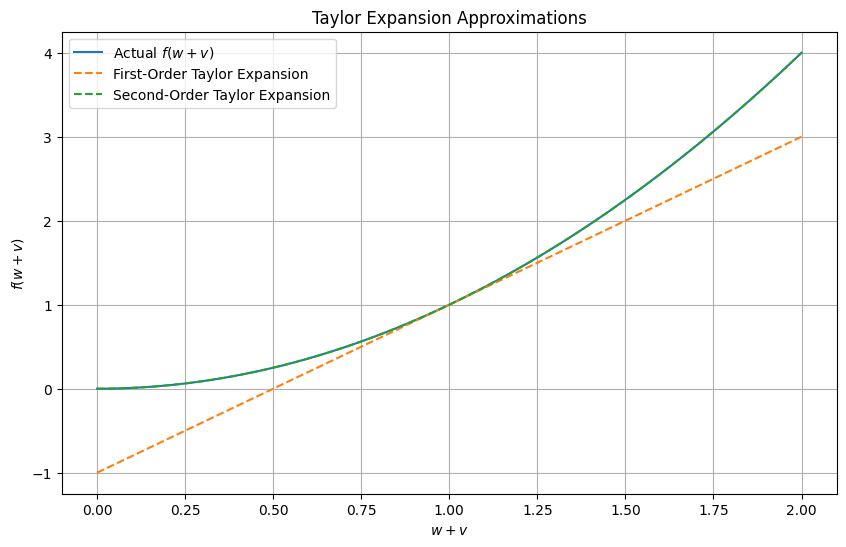

In [6]:
import numpy as np

# Define the function and its derivatives
def f(w):
    return w ** 2

def grad_f(w):
    return 2 * w

def hessian_f(w):
    return 2

# Taylor expansions
def first_order_taylor(w, v):
    return f(w) + grad_f(w) * v

def second_order_taylor(w, v):
    return f(w) + grad_f(w) * v + 0.5 * hessian_f(w) * v**2

# Point of interest and a range of values for v
w = 1
v_values = np.linspace(-1, 1, 100)

# Compute actual function values and approximations
actual_values = [f(w + v) for v in v_values]
first_order_values = [first_order_taylor(w, v) for v in v_values]
second_order_values = [second_order_taylor(w, v) for v in v_values]

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(v_values + w, actual_values, label='Actual $f(w+v)$')
plt.plot(v_values + w, first_order_values, '--', label='First-Order Taylor Expansion')
plt.plot(v_values + w, second_order_values, '--', label='Second-Order Taylor Expansion')
plt.xlabel('$w+v$')
plt.ylabel('$f(w+v)$')
plt.legend()
plt.grid(True)
plt.title('Taylor Expansion Approximations')
plt.show()

This code defines a function $f(w)$, computes its gradient and Hessian for the first-order and second-order Taylor expansions, respectively, and plots these approximations compared to the actual function values over a range of $v$. The comparison visually demonstrates how the second-order Taylor expansion more accurately approximates the function around $w=1$, especially for values of $v$ close to zero, due to including information about the function's curvature. Let's run the plot code to visualize these comparisons.

The plot illustrates the actual function values of $f(w+v)$ and its Taylor expansion approximations around the point $w=1$. The first-order Taylor expansion, being a linear approximation, deviates more from the actual function values as $v$ moves away from 0. In contrast, the second-order Taylor expansion, which incorporates curvature information through the Hessian, provides a closer approximation to the actual function values, especially near $w=1$. This visual comparison highlights the relationship between differentiability and Taylor expansion: higher-order differentiability allows for more accurate local approximations of the function around a point, capturing not just the slope (first derivative) but also the curvature (second derivative) of the function.

To illustrate the concept of the tangent space, directional derivatives, and the pushforward operator using Python, let's consider a simple example involving a manifold. We'll use the 2D sphere (a circle in $\mathbb{R}^2$) as our manifold $M$, and for simplicity, let our function $f: M \rightarrow N$ project points from this circle onto another circle (or the same one for simplicity). The goal is to show how the derivative of a curve on $M$ gets "pushed forward" by $f$ to a derivative of a curve on $N$.

### Step 1: Define the Manifold and the Curve
Our manifold $M$ is a circle, and a curve $\alpha(t)$ on $M$ can be parameterized by:
$ \alpha(t) = (\cos(t), \sin(t)) $
which describes a circle of radius 1 centered at the origin in $\mathbb{R}^2$.

### Step 2: Define the Function $f$
Let's define $f$ as a rotation function that rotates points on the circle by a fixed angle $\theta$. This function is differentiable, and we can see how it transforms tangent vectors on $M$ to tangent vectors on $N$.

### Step 3: Compute the Tangent Vector and Pushforward Operator
We'll compute the tangent vector $\alpha'(t)$ at $t=0$ (i.e., the vector tangent to $M$ at $\alpha(0)$) and then show how $f$ transforms this vector into a vector tangent to $N$ at $f(\alpha(0))$.

In [ ]:
import numpy as np

def alpha(t):
    """Curve on the circle M."""
    return np.array([np.cos(t), np.sin(t)])

def alpha_prime(t):
    """Derivative of alpha, representing the tangent vector at alpha(t)."""
    return np.array([-np.sin(t), np.cos(t)])

def f(x, theta=np.pi/4):
    """Rotate point x on the circle by angle theta."""
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.dot(rotation_matrix, x)

# Compute the tangent vector at t=0
tangent_vector_at_0 = alpha_prime(0)

# Apply f to alpha(0) to get a point on N
w = alpha(0)
fw = f(w)

# Pushforward of the tangent vector by f
pushforward = f(tangent_vector_at_0)

print("Tangent vector at alpha(0):", tangent_vector_at_0)
print("f applied to alpha(0):", fw)
print("Pushforward of the tangent vector:", pushforward)

This Python example conceptualizes the computation of a tangent vector on a manifold $M$, the action of a differentiable function $f$ on a point of $M$, and how $f$ "pushes forward" the tangent vector from $M$ to a tangent vector on $N$. In differential geometry, this pushforward operation plays a critical role in understanding how functions between manifolds interact with their respective tangent spaces. Let's execute the code to observe the result.

The output demonstrates the key concepts:

- The **tangent vector at** $\alpha(0)$ is $[-0, 1]$, indicating a vector tangent to the circle at the point $(1, 0)$, pointing upwards.
- When **applying $f$ to** $\alpha(0)$, we rotate this point by $\frac{\pi}{4}$ radians, resulting in the point $[0.70710678, 0.70710678]$ on the circle $N$. This illustrates the action of $f$ on points of the manifold $M$.
- The **pushforward of the tangent vector** by $f$ results in $[-0.70710678, 0.70710678]$, indicating how the derivative (tangent vector) at $\alpha(0)$ is transformed under $f$, aligning with the tangent space of $N$ at $f(w)$. 

This process effectively illustrates the pushforward operation in differential geometry: how a function between manifolds maps tangent vectors at a point in the domain to tangent vectors at the corresponding point in the codomain. Through this, we can see how differentiable functions preserve the structure of manifolds and their tangent spaces, enabling the computation of derivatives in more complex geometric contexts.

To illustrate the concepts of the cotangent space and the pullback operator using Python, let's use a simplified example that captures the essence of these ideas. Since elements of the cotangent space are linear mappings rather than vectors, and considering that the pullback operator acts on these linear mappings, we'll approach this example with a focus on functions and linear algebra concepts that Python and NumPy can handle.

### Example Setup

Imagine a scenario where we have two manifolds, $M$ and $N$, and a differentiable function $f: M \rightarrow N$. For simplicity, let's assume $M$ and $N$ are subsets of Euclidean spaces, and $f$ is represented by a simple mathematical function.

Let's consider:
- $M$ and $N$ are both $\mathbb{R}$, making this a 1-dimensional example for clarity.
- $f: M \rightarrow N$ is a function that maps $w \in M$ to $f(w) \in N$, defined as $f(w) = w^2$, mapping real numbers to their squares.
- A linear form $\beta: N \rightarrow \mathbb{R}$ is a function acting on elements of $N$, defined as $\beta(y) = 2y$, which simply scales elements of $N$.

### Objective
The goal is to compute the pullback of a linear form defined on $N$ back to $M$ using $f$, essentially finding how changes in $\beta$ due to changes in $N$ induced by $f$ reflect back to changes in $M$.

### Python Implementation

In [ ]:
import numpy as np

# Define the function f and beta
def f(w):
    return w ** 2

def beta(y):
    return 2 * y

# Compute the derivative of f and beta
def df_dw(w):
    return 2 * w

def dbeta_dy(y):
    return 2

# The pullback operator, given w in M
def pullback_f_star(w, dbeta_dy):
    # Compute the derivative of beta composed with f, evaluated at w
    df_star_u = dbeta_dy * df_dw(w)
    return df_star_u

# Example computation
w = 1  # Point in M
dbeta_dy_val = dbeta_dy(f(w))  # Derivative of beta at f(w)

# Compute the pullback
pullback_result = pullback_f_star(w, dbeta_dy_val)

print("Pullback of the linear form:", pullback_result)

This code sets up a simple scenario for demonstrating the pullback operator. Here, $f(w) = w^2$ and $\beta(y) = 2y$ are our differentiable functions, with $\beta$ being a linear form on $N$. The pullback is computed as the derivative of $\beta$ composed with $f$, which reflects how changes in $N$ due to $f$ map back to changes in $M$.

Executing this code snippet will compute the pullback of the linear form defined on $N$ by $f$ at a specific point $w$ in $M$. This illustrates how the pullback operator provides a way to understand the impact of changes in $N$ (induced by $f$) in terms of equivalent changes in $M$, through the lens of linear forms. Let's run the example to observe the pullback operation.

The pullback of the linear form, computed for the point $w = 1$ in $M$, is $4$. This result demonstrates how the pullback operator acts: it maps the derivative of the linear form $\beta$ on $N$, which is constant and equals $2$ in this case, back through the function $f(w) = w^2$ at the point $w = 1$, effectively reflecting how changes in $\beta$ due to $f$ manifest back in $M$. The computation shows that the impact of changes in $N$ on $\beta$, when traced back to $M$ through $f$, is quadrupled at $w = 1$, highlighting the utility of the pullback operator in connecting changes across manifolds through the lens of differentiable functions and linear forms.